In [13]:
# Organize imports
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions
from utils import RandomIterator, get_mnist
import matplotlib.pyplot as plt
import matplotlib

In [14]:
# Retrieve train & test data      
train, test = get_mnist()
# split test inputs and labels
inputs, labels = np.array([tup[0] for tup in test]), np.array([tup[1] for tup in test])
# Set up model & classifier
model = MLP(10,10)
classifier = Classifier(model)
optimizer = optimizers.SGD()
optimizer.setup(classifier)

In [31]:
# Define network & top classifier class
class MLP(Chain):
    """
    
    Implementation of a 3-layer Multilayer Perceptron
    
    """
    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units) # Input layer n_units -> n_units
            self.l2 = L.Linear(None, n_units)
            self.l3 = L.Linear(n_units, n_out)
        
    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        output = self.l3(h2)
        return output
  
class Classifier(Chain):
    """
    Classifier chain on top of MLP chain 
    for accuracy evaluation and prediction
    
    """
    def __init__(self, predictor):
        super(Classifier, self).__init__()
        with self.init_scope():
            self.predictor = predictor
    
    def __call__(self, x, t):
        y = self.predictor(x)
        loss = F.softmax_cross_entropy(y, t)
        accuracy = F.accuracy(y, t)
        report({'loss': loss, 'accuracy': accuracy}, self)
        return loss


In [32]:
# Retrieve train & test data      
train, test = get_mnist(n_train=100, n_test=100)
# split test inputs and labels
inputs, labels = np.array([tup[0] for tup in test]), np.array([tup[1] for tup in test])
# Set up model & classifier
model = MLP(10,10)
classifier = Classifier(model)
optimizer = optimizers.SGD()
optimizer.setup(classifier)


In [33]:
# Implement the training & test loop

iterator = RandomIterator(train,32)

av_loss = []
ep_loss = []
test_loss = []
for epoch in range(1,21):
     for batch in iterator:
        sources,targets = batch[0], batch[1]
        classifier.cleargrads()
        loss = F.sum(classifier(sources, targets))
        loss.backward()
        av_loss.append(loss.data)    
        optimizer.update()
     loss =  sum(av_loss) / len(av_loss)
     print({'epoch': epoch, 'train_loss': loss})
     ep_loss.append({'epoch': epoch, 'loss': loss})
     # test classifier
     loss = F.sum(classifier(inputs, labels))
     print({'epoch': epoch, 'test_loss': float(loss.data)})
     test_loss.append({'epoch': epoch, 'loss': loss.data})
     av_loss = []

{'epoch': 1, 'train_loss': 2.3024972792594665}
{'epoch': 1, 'test_loss': 2.297433614730835}
{'epoch': 2, 'train_loss': 2.2762883940050678}
{'epoch': 2, 'test_loss': 2.274179220199585}
{'epoch': 3, 'train_loss': 2.2449710292200886}
{'epoch': 3, 'test_loss': 2.244617462158203}
{'epoch': 4, 'train_loss': 2.2060346680302776}
{'epoch': 4, 'test_loss': 2.2102677822113037}
{'epoch': 5, 'train_loss': 2.1649944628438642}
{'epoch': 5, 'test_loss': 2.17476224899292}
{'epoch': 6, 'train_loss': 2.123236740789106}
{'epoch': 6, 'test_loss': 2.13771390914917}
{'epoch': 7, 'train_loss': 2.0783579234153993}
{'epoch': 7, 'test_loss': 2.0966148376464844}
{'epoch': 8, 'train_loss': 2.0289291374145018}
{'epoch': 8, 'test_loss': 2.0541906356811523}
{'epoch': 9, 'train_loss': 1.9796749238044984}
{'epoch': 9, 'test_loss': 2.0082406997680664}
{'epoch': 10, 'train_loss': 1.9294930119668283}
{'epoch': 10, 'test_loss': 1.961564064025879}
{'epoch': 11, 'train_loss': 1.8765241292215162}
{'epoch': 11, 'test_loss': 1.

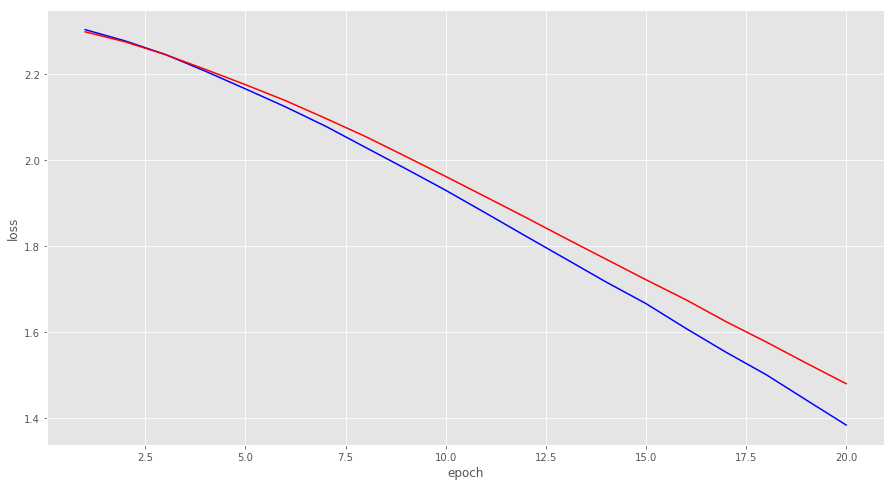

In [34]:
matplotlib.style.use('ggplot')
figure = plt.figure(figsize=(15,8))
ax = figure.add_subplot(111)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
e_train, l_train = [point['epoch'] for point in ep_loss], [point['loss'] for point in ep_loss]
e_test, l_test = [point['epoch'] for point in test_loss], [point['loss'] for point in test_loss]
plt.plot(e_train, l_train, 'b')
plt.plot(e_test, l_test, 'r')
plt.show() 